### Problem Statement:

#### Refer house pricing dataset. Apply appropriate EDA methods wherever required and perform feature engineering. Construct a model using a decision tree. Analyse the performance of the model with suitable evaluation measures.

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import warnings
warnings.filterwarnings('ignore')

### Load house pricing dataset

In [4]:
df = pd.read_csv('USA_Housing-Copy1.csv')
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


In [5]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [6]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [7]:
df.dtypes

Avg. Area Income                float64
Avg. Area House Age             float64
Avg. Area Number of Rooms       float64
Avg. Area Number of Bedrooms    float64
Area Population                 float64
Price                           float64
Address                          object
dtype: object

### Preprocess the data

In [9]:
df.isna().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

#### Checking Duplicates in data

In [10]:
df.duplicated().sum()

0

### Exporatory Data Analysis

#### Distribution Plot of Price Column

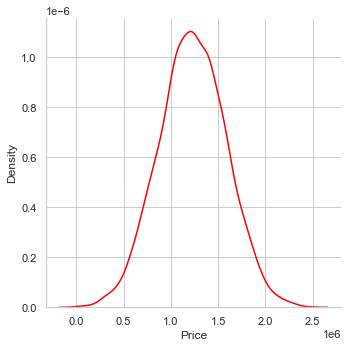

In [13]:
sns.displot(df.Price,kind = 'kde',color = 'red')

Price column follow normal distribution

#### Heatmap showing the correlation coefficients between all pairs of features in the dataset.

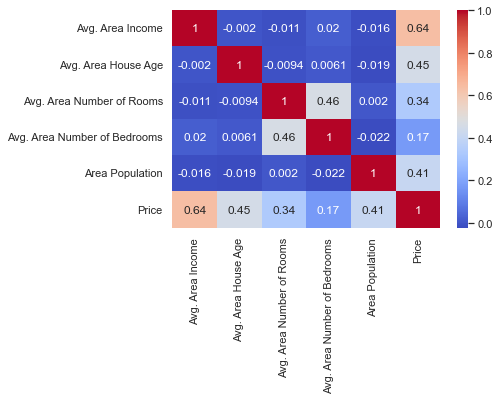

In [14]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap = 'coolwarm', annot = True);

`Avg. Area Income` column is having the higest correlation with `Price` columns 
And remaning columns having negative correlation with `Price` columns 

In [15]:
X = df.drop(['Price','Address'], axis = 1)
Y = df['Price']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

### Fitting the model

In [16]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth = 5)

In [17]:
model.fit(X_train,Y_train)

DecisionTreeRegressor(max_depth=5)

In [18]:
Y_pred=model.predict(X_test)
Y_pred

array([ 827128.14056814,  847280.36797475, 1047544.49882175,
        808462.36101596,  745612.02428905, 1228380.56977463,
        808462.36101596,  808462.36101596, 1677747.76396343,
       1467916.73748222, 1052810.99344645, 1228380.56977463,
       2049294.45081517,  847280.36797475, 1047544.49882175,
       1054951.98808878, 1284552.88317858,  827128.14056814,
       1467916.73748222, 1368713.97174601, 1047544.49882175,
       1052810.99344645, 1467916.73748222, 1057572.55921812,
       1301830.5163635 , 1054951.98808878, 1047544.49882175,
       1467916.73748222, 1368713.97174601, 1445373.01463279,
       1301830.5163635 , 1677747.76396343, 1028522.29998854,
       1445373.01463279, 1228380.56977463,  847280.36797475,
       1052810.99344645, 1750883.93907996, 1260416.02879929,
       1368713.97174601, 1467916.73748222,  827128.14056814,
       1248870.24591597, 1228380.56977463,  745612.02428905,
       1526671.76378248, 1234567.6235955 , 1515806.76301118,
       1134434.51152028,

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("Mean Absolute Error:", mean_absolute_error(Y_pred,Y_test))
print("Mean Squared Error:",mean_squared_error(Y_pred,Y_test))
print("Mean Squared error:", mean_squared_error(Y_pred,Y_test)**0.5)
print("R2 Score:", r2_score(Y_test,Y_pred))

Mean Absolute Error: 167148.21588413752
Mean Squared Error: 43822679589.797264
Mean Squared error: 209338.6719882336
R2 Score: 0.6454441941750708


In [26]:
model.score(X_test,Y_test)

0.6454441941750708

### Decision Tree

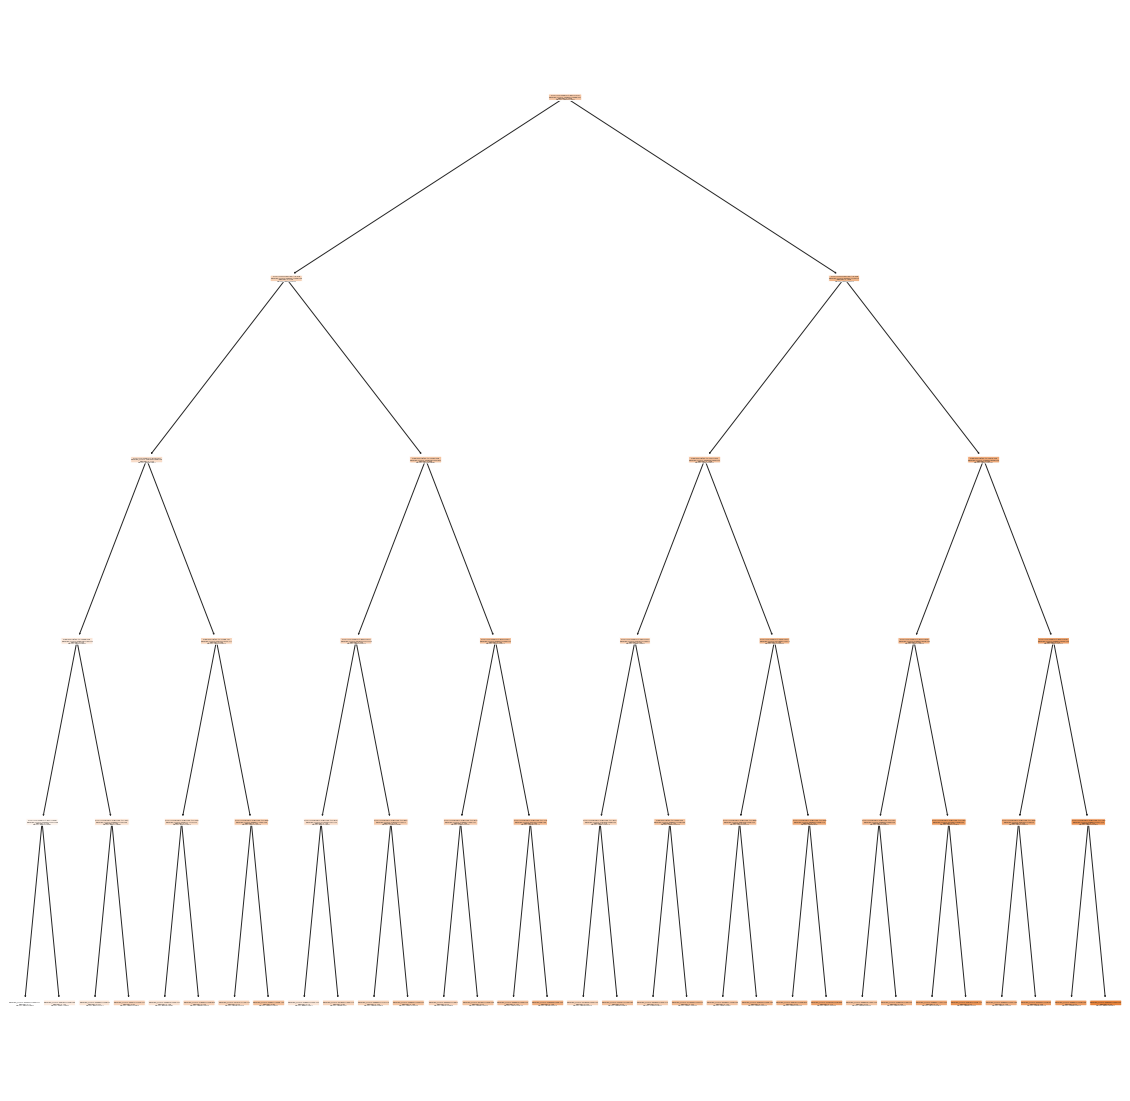

In [27]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,20))
plot_tree(model,filled=True,rounded=True,feature_names=X_train.columns,class_names=['0','1']);
#plt.savefig('tree.png',dpi=900,bbox_inches='tight')
plt.show()